In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import joblib
from sklearn.inspection import permutation_importance


In [16]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


random forest 精确度： 0.9615384615384616
Random Forest选择的重要特征: ['OSI16' 'OSI12' 'OSI7' 'OSI17' 'OSI3' 'OSI11' 'PANAS2' 'OSI14' 'OSI10'
 'OSI15' 'OSI2' 'PANAS11' 'STPQjs1' 'STPQjs12' 'PBSMHS20' 'OSI6' 'STPQai4'
 'MBIGS9' 'STPQjs10' 'STPQpe14' 'STPQjs7' 'STPQawt3' 'PANAS19' 'MBIGS12'
 'LSS4' 'PBSMHS4' 'OSI5' 'STPQsc1' 'WFCS4' 'WFCS3']


/var/folders/6r/np24csk96nn1jm3ckkjcn48r0000gq/T/ipykernel_28088/768074720.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datasetnew['suicide'] = Dataset['suicide']


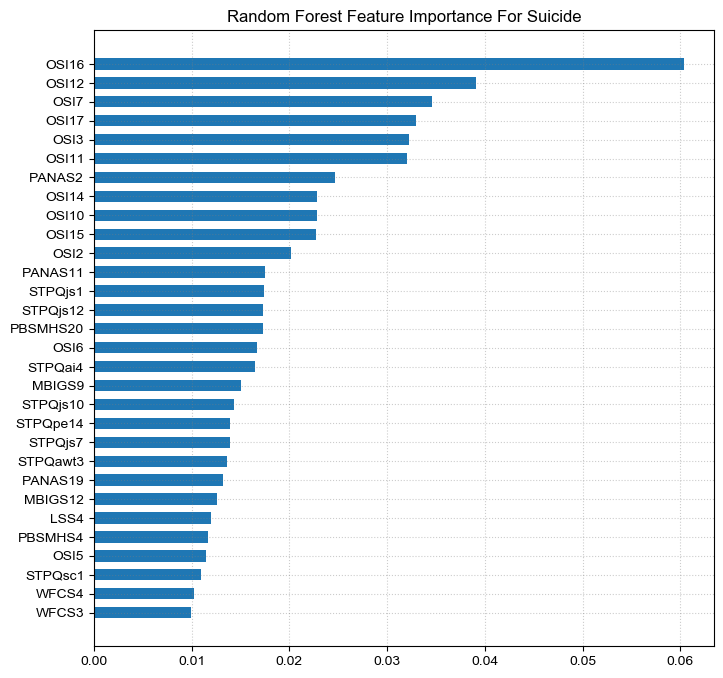

'\nxgb model\nmax_depth:树的最大深度\n'

In [32]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/IterativeImputer-科技人员抑郁量表目标值分组.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/随机森林-科技人员抑郁量表目标值分组.csv"

# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/IterativeImputer抑郁量表处理后数据.csv"
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/IterativeImputer焦虑量表处理后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/IterativeImputer自杀预测处理后数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
# x = Dataset.loc[:,  "睡眠":"个人创新行为"]
x = Dataset.loc[:, "STPQpost1":"WORKTIME4"]
# y = Dataset.loc[:, "anxiety"]
# y = Dataset.loc[:, "depression"]
y = Dataset.loc[:, "suicide"]

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

"""
random forest model
max_depth:树的最大深度
"""
rf_model_without_selection = RandomForestClassifier(n_estimators = 100,random_state=42)
rf_model_without_selection.fit(x_train, y_train)
print("random forest 精确度：",rf_model_without_selection.score(x_test,y_test))

rf_feature_important = rf_model_without_selection.feature_importances_
rf_x_score = np.sort(rf_feature_important)[::-1]
rf_rank_idx  = np.argsort(rf_feature_important)[::-1]
rf_selected_rank_idx = rf_rank_idx[:number]
rf_selected_rank_names = names_dicts.loc[:, rf_selected_rank_idx]
rf_label = rf_selected_rank_names.values[0, :]

label = rf_selected_rank_names.values[0, :]
Datasetnew = Dataset[label]
# Datasetnew['depression'] = Dataset['depression']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/科技人员抑郁量表-重要特征数据.csv",sep=',',index=False)

# Datasetnew['anxiety'] = Dataset['anxiety']
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/科技人员焦虑表-重要特征数据.csv",sep=',',index=False)

Datasetnew['suicide'] = Dataset['suicide']
Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/科技人员自杀倾向-重要特征数据.csv",sep=',',index=False)

print("Random Forest选择的重要特征:",rf_label)

# 随机森林可视化
plt.figure(figsize=(8, 8))
plt.barh(rf_label[::-1], rf_x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Random Forest Feature Importance For Suicide")
plt.savefig("前"+str(number)+"名特征")
plt.show()

"""
xgb model
max_depth:树的最大深度
"""
# model = xgb.XGBRFClassifier(max_depth=10, learning_rate=0.16, n_estimators=100, min_child_weight=4)
# model.fit(x_train, y_train)
# print("XGB 精确度：",model.score(x_test,y_test))
# feature_important = model.feature_importances_
# rank_idx  = np.argsort(feature_important)[::-1]
# selected_rank_idx = rank_idx[:number]
# selected_rank_names = names_dicts.loc[:, selected_rank_idx]
# label = selected_rank_names.values[0, :]
# Datasetnew = Dataset[label]
# # Datasetnew['depression'] = Dataset['depression']
# Datasetnew['anxiety'] = Dataset['anxiety']
# # Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/科技人员抑郁量表-重要特征数据.csv",sep=',',index=False)
# Datasetnew.to_csv("/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/科技人员焦虑表-重要特征数据.csv",sep=',',index=False)

# print("XGB 选择的重要特征:",label)
# path1 = r"Xgboost排名前" + str(number) + "的特征.csv"
# pd.DataFrame(label).to_csv(path1, index=False)
# x_score = np.sort(feature_important)[::-1]
# path = r"Xgboost排名前" + str(number) + "的得分.csv"
# pd.DataFrame(x_score[:number]).to_csv(path, index=False)
# #网格搜索调参
# # param_dist = {
# #         'n_estimators':range(80,200,4),
# #         'max_depth':range(2,15,1),
# #         'learning_rate':[0.01,0.02,0.1]
# #         }
# # gsCv = GridSearchCV(model,param_dist,cv=5)

# # gsCv.fit(x_train, y_train)
# # print(gsCv.best_params_)
# # print("网格XGB 精确度：",gsCv.score(x_test,y_test))

# # cv_results = pd.DataFrame(gsCv.cv_results_)
# # path = r"paramRank.csv"
# # cv_results.to_csv(path, index=False)

# # # 可视化
# # plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
# # plt.xlabel("Feature")
# # plt.ylabel("Feature Score")
# # plt.title("Feature Importance")
# # plt.show()

# # 可视化
# plt.figure(figsize=(8, 8))
# plt.barh(label[::-1], x_score[:number][::-1], 0.6, align='center')
# plt.grid(ls=':', color='gray', alpha=0.4)
# plt.title("Xgboost Feature Importance")
# plt.savefig("前"+str(number)+"名特征")
# plt.show()